# Загрузка данных в ноутбук

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../../Kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

../../Kaggle/xxx_test.csv
../../Kaggle/xxx_train.csv
../../Kaggle/xxx_submission.csv


In [3]:
%pylab inline
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings("ignore") # отключение варнингов
pd.set_option('display.max_columns', None) # pd.options.display.max_columns = None 
# pd.set_option('display.max_rows', None) # не прятать столбцы при выводе дата-фреймов
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [4]:
train = pd.read_csv('../../Kaggle/xxx_train.csv')
test = pd.read_csv('../../Kaggle/xxx_test.csv')
# размеры данных
print(train.shape, test.shape)

(10000, 301) (50000, 300)


In [5]:
train.sample(5)

,X_0_0,X_0_1,X_0_2,X_1_0,X_1_1,X_1_2,X_2_0,X_2_1,X_2_2,X_3_0,X_3_1,X_3_2,X_4_0,X_4_1,X_4_2,X_5_0,X_5_1,X_5_2,X_6_0,X_6_1,X_6_2,X_7_0,X_7_1,X_7_2,X_8_0,X_8_1,X_8_2,X_9_0,X_9_1,X_9_2,X_10_0,X_10_1,X_10_2,X_11_0,X_11_1,X_11_2,X_12_0,X_12_1,X_12_2,X_13_0,X_13_1,X_13_2,X_14_0,X_14_1,X_14_2,X_15_0,X_15_1,X_15_2,X_16_0,X_16_1,X_16_2,X_17_0,X_17_1,X_17_2,X_18_0,X_18_1,X_18_2,X_19_0,X_19_1,X_19_2,X_20_0,X_20_1,X_20_2,X_21_0,X_21_1,X_21_2,X_22_0,X_22_1,X_22_2,X_23_0,X_23_1,X_23_2,X_24_0,X_24_1,X_24_2,X_25_0,X_25_1,X_25_2,X_26_0,X_26_1,X_26_2,X_27_0,X_27_1,X_27_2,X_28_0,X_28_1,X_28_2,X_29_0,X_29_1,X_29_2,X_30_0,X_30_1,X_30_2,X_31_0,X_31_1,X_31_2,X_32_0,X_32_1,X_32_2,X_33_0,X_33_1,X_33_2,X_34_0,X_34_1,X_34_2,X_35_0,X_35_1,X_35_2,X_36_0,X_36_1,X_36_2,X_37_0,X_37_1,X_37_2,X_38_0,X_38_1,X_38_2,X_39_0,X_39_1,X_39_2,X_40_0,X_40_1,X_40_2,X_41_0,X_41_1,X_41_2,X_42_0,X_42_1,X_42_2,X_43_0,X_43_1,X_43_2,X_44_0,X_44_1,X_44_2,X_45_0,X_45_1,X_45_2,X_46_0,X_46_1,X_46_2,X_47_0,X_47_1,X_47_2,X_48_0,X_48_1,X_48_2,X_49_0,X_49_1,X_49_2,X_50_0,X_50_1,X_50_2,X_51_0,X_51_1,X_51_2,X_52_0,X_52_1,X_52_2,X_53_0,X_53_1,X_53_2,X_54_0,X_54_1,X_54_2,X_55_0,X_55_1,X_55_2,X_56_0,X_56_1,X_56_2,X_57_0,X_57_1,X_57_2,X_58_0,X_58_1,X_58_2,X_59_0,X_59_1,X_59_2,X_60_0,X_60_1,X_60_2,X_61_0,X_61_1,X_61_2,X_62_0,X_62_1,X_62_2,X_63_0,X_63_1,X_63_2,X_64_0,X_64_1,X_64_2,X_65_0,X_65_1,X_65_2,X_66_0,X_66_1,X_66_2,X_67_0,X_67_1,X_67_2,X_68_0,X_68_1,X_68_2,X_69_0,X_69_1,X_69_2,X_70_0,X_70_1,X_70_2,X_71_0,X_71_1,X_71_2,X_72_0,X_72_1,X_72_2,X_73_0,X_73_1,X_73_2,X_74_0,X_74_1,X_74_2,X_75_0,X_75_1,X_75_2,X_76_0,X_76_1,X_76_2,X_77_0,X_77_1,X_77_2,X_78_0,X_78_1,X_78_2,X_79_0,X_79_1,X_79_2,X_80_0,X_80_1,X_80_2,X_81_0,X_81_1,X_81_2,X_82_0,X_82_1,X_82_2,X_83_0,X_83_1,X_83_2,X_84_0,X_84_1,X_84_2,X_85_0,X_85_1,X_85_2,X_86_0,X_86_1,X_86_2,X_87_0,X_87_1,X_87_2,X_88_0,X_88_1,X_88_2,X_89_0,X_89_1,X_89_2,X_90_0,X_90_1,X_90_2,X_91_0,X_91_1,X_91_2,X_92_0,X_92_1,X_92_2,X_93_0,X_93_1,X_93_2,X_94_0,X_94_1,X_94_2,X_95_0,X_95_1,X_95_2,X_96_0,X_96_1,X_96_2,X_97_0,X_97_1,X_97_2,X_98_0,X_98_1,X_98_2,X_99_0,X_99_1,X_99_2,y
3313,0.0,6.0,-1.00,0.0,1.0,-1.00,3.0,65.0,1.10,2.0,-1.0,0.27,2.0,-1.0,2.81,3.0,69.0,2.66,1.0,0.0,1.00,2.0,-1.0,2.36,1.0,83.0,2.00,2.0,-1.0,2.00,1.0,91.0,2.00,1.0,23.0,2.00,1.0,7.0,0.00,0.0,4.0,-1.00,1.0,91.0,0.0,1.0,27.0,0.00,2.0,-1.0,0.98,2.0,-1.0,0.68,3.0,45.0,0.46,2.0,-1.0,2.67,1.0,44.0,1.00,1.0,56.0,2.00,3.0,39.0,1.28,1.0,9.0,1.00,0.0,4.0,-1.00,1.0,78.0,0.00,1.0,73.0,2.00,2.0,-1.0,1.40,3.0,6.0,0.59,2.0,-1.0,2.25,1.0,30.0,3.00,3.0,61.0,1.09,1.0,72.0,0.00,0.0,1.0,-1.0,0.0,4.0,-1.0,0.0,3.0,-1.0,2.0,-1.0,1.30,1.0,42.0,1.0,0.0,6.0,-1.00,0.0,5.0,-1.00,2.0,-1.0,1.02,2.0,-1.0,2.80,0.0,2.0,-1.00,0.0,4.0,-1.0,2.0,-1.0,0.47,2.0,-1.0,2.72,3.0,27.0,0.32,2.0,-1.0,2.74,2.0,-1.0,1.22,3.0,61.0,2.01,3.0,88.0,1.25,2.0,-1.0,0.59,3.0,17.0,2.80,2.0,-1.0,0.52,3.0,17.0,1.31,0.0,3.0,-1.00,1.0,74.0,3.00,1.0,16.0,3.00,1.0,17.0,1.00,1.0,47.0,1.00,2.0,-1.0,2.65,3.0,83.0,1.55,0.0,5.0,-1.00,1.0,93.0,0.00,2.0,-1.0,0.60,3.0,15.0,0.08,1.0,46.0,3.00,2.0,-1.0,2.27,2.0,-1.0,0.16,0.0,5.0,-1.00,1.0,91.0,2.0,3.0,44.0,1.69,1.0,69.0,3.00,3.0,23.0,1.86,3.0,61.0,0.67,0.0,6.0,-1.00,1.0,25.0,2.00,2.0,-1.0,2.28,1.0,37.0,0.00,1.0,21.0,0.00,2.0,-1.0,1.46,3.0,91.0,1.27,2.0,-1.0,1.61,0.0,3.0,-1.00,1.0,78.0,0.00,3.0,67.0,1.23,3.0,98.0,1.44,1.0,97.0,3.00,3.0,66.0,0.96,1.0,64.0,2.00,0.0,2.0,-1.00,3.0,64.0,2.00,0.0,6.0,-1.00,3.0,71.0,0.67,2.0,-1.0,2.66,0.0,4.0,-1.00,3.0,92.0,1.27,1.0,94.0,3.00,3.0,2.0,0.57,3.0,20.0,0.90,24.0
2214,1.0,81.0,0.00,1.0,69.0,1.00,2.0,-1.0,1.92,3.0,35.0,2.21,1.0,65.0,1.00,1.0,75.0,2.00,0.0,2.0,-1.00,3.0,13.0,1.40,1.0,45.0,0.00,2.0,-1.0,1.38,0.0,2.0,-1.00,2.0,-1.0,1.00,3.0,89.0,1.43,0.0,1.0,-1.00,0.0,1.0,-1.0,0.0,3.0,-1.00,2.0,-1.0,2.46,0.0,2.0,-1.00,2.0,-1.0,2.16,3.0,90.0,1.49,2.0,-1.0,1.73,2.0,-1.0,1.61,1.0,68.0,2.00,3.0,12.0,1.93,0.0,6.0,-1.00,3.0,11.0,0.11,2.0,-1.0,2.80,3.0,86.0,0.76,3.0,83.0,1.74,3.0,82.0,1.89,2.0,-1.0,2.23,2.0,-1.0,2.04,1.0,87.0,2.00,0.0,4.0,-1.0,1.0,71.0,3.0,0.0,2.0,-1.0,2.0,-1.0,0.82,0.0,3.0,-1

## Целевой вектор y

In [10]:
y = train.pop('y') # целевой вектор
train.shape, y.shape

((10000, 0), (10000,))

## Создание матрицы признаком $Matrix \in \mathbb{R}^{10000\times300}$

In [8]:
Matrix = np.zeros((10000, 300))

for i in range(100):
    for j in range(3):
        ind = 3*i + j
        Matrix[:, ind] = np.array(train.pop('X_'+str(i)+'_'+str(j)))

print(Matrix.shape)
print(y.shape)

## Создание Матрицы тестовой выборки $\mathbb{R}^{50000\times300}$

In [40]:
Tester = np.array(test)
print(Tester.shape)

(50000, 300)


# Сравнение классификаторов Sklearn

## Использование кросс-валидации для оценки моделей на данных(Matrix)

In [63]:
from sklearn.model_selection import KFold

In [64]:
kf = KFold(n_splits=10)

for train_index, test_index in kf.split(Matrix, y):
    X_train, X_test = Matrix[train_index], Matrix[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

### Непредвзятая проверка моделей обучения
1. Обучаем модели на разбитых в методе KFold данных
2. Выводим точности для каждой
3. Из лучших составляем ансамбль
4. Проверяем его точность в сравнении с отдельными моделями
5. Выбираем лучшую модель
6. Обучаем модель на всей выборке
7. Предсказываем ответ и отправляем на проверку

In [65]:
from sklearn.model_selection import GridSearchCV     #Поиск лучших моделей
from sklearn.neighbors import KNeighborsRegressor    #K ближайших соседей, определим лучший параметр
from sklearn.ensemble import RandomForestRegressor   #Случайный лес. ВАЖНО: ограничить max_depth, иначе ооочень долго
from sklearn.linear_model import LogisticRegression  #Логистическая регрессия
from sklearn.ensemble import VotingRegressor         #Регрессор голосвания - ансамбль лучших моделей
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree

#### KNN

In [66]:
knn = KNeighborsRegressor()
params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, y_train)

#save best model
knn_best = knn_gs.best_estimator_
print(knn_gs.best_params_)

{'n_neighbors': 24}


#### Random Forest

In [38]:
rf = RandomForestRegressor(n_estimators=10000, max_depth= 3)
rf.fit(Matrix, y)

RandomForestRegressor(max_depth=3, n_estimators=10000)

In [35]:
rf1 = RandomForestRegressor(n_estimators=500, max_depth= 3)
rf1.fit(Matrix, y)

RandomForestRegressor(max_depth=3, n_estimators=500)

In [36]:
rf2 = RandomForestRegressor(n_estimators=1000, max_depth= 3)
rf2.fit(Matrix, y)

RandomForestRegressor(max_depth=3, n_estimators=1000)

In [67]:
rf = RandomForestRegressor()
params_rf = {'n_estimators': [100, 500, 1000, 5000, 10000], 'max_depth' : [3]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)
#rf_gs.fit(Matrix, y)
#save best model
rf_best = rf_gs.best_estimator_
print(rf_gs.best_params_)

KeyboardInterrupt: 

#### Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train, y_train)

#### SGDClassifier

In [ ]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

#### Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

#### Ada Boost

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

#### Decision tree

In [ ]:
tre = tree.DecisionTreeRegressor()
tre.fit(X_train, y_train)

#### Ансамбль моделей -- регрессор голосования

In [54]:
estimators=[('knn', knn_best), ('rf', rf_best), ('log', log), ('ada', ada), ('dec', tre), ('gaus', model), ('sgd', sgd)]
ensemble = VotingClassifier(estimators, voting='hard')

__Проверка результатов__

In [55]:
ensemble.fit(X_train, y_train)
ensemble.score(X_test, y_test)

0.046

__Проверка точности предыдущих моделей__

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def accuracy(model, X_test = X_test, y_test = y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
print("KNN " + str(accuracy(knn_best)))
print("RandomForest " + str(accuracy(rf_best)))
print("Logistic " + str(accuracy(log)))
print("SGD " + str(accuracy(sgd)))
print("Gaussian " + str(accuracy(model)))
print("Ada " + str(accuracy(ada)))
print("DecTree " + str(accuracy(tre)))

## Результат регрессоров sklearn
Лучшей моделью оказался:

Точность:

Ошибка:

# Использование корреляции Пирсона и t-критерия Стьюдента для выбора значимых признаков

## Проверка на нормальность распределения y, то есть $Y \sim \mathbb{N}(18.3, 6.87^2)$

In [14]:
sigma = 6.87
mu = 18.3

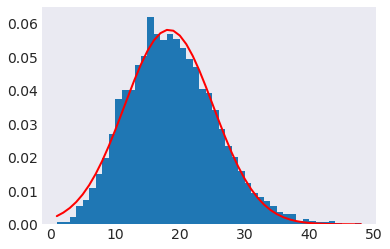

In [123]:
count, bins, ignored = plt.hist(y, 47, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

## Определение корреляции Пирсона

In [41]:
def pearson(a,b):
    a_avg, b_avg = np.average(a), np.average(b)
    a_stdev, b_stdev = np.std(a), np.std(b)
    n = len(a)
    denominator = a_stdev * b_stdev * n
    numerator = np.sum(np.multiply(a-a_avg, b-b_avg))
    p_coef = numerator/denominator
    return p_coef

In [42]:
# Корреляции входных признаков с ответом y
corrs = np.zeros((300))
for i in range(300):
    corrs[i] = pearson(Matrix[:,i], y)

## t-критерий Стьюдента для оценки значимости корреляции

In [22]:
t = np.zeros_like(corrs)
t = corrs/np.sqrt(1-corrs**2) * np.sqrt(300-2)

## Получение результирующего вектора

In [121]:
y = tester.dot(mas1)

In [122]:
print(y.shape)

(50000,)


# Алгоритмы машинного обучения

# Подход к задаче с точки зрения теории вероятностей

In [ ]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

Пусть $y_j(x) = \frac{1}{10000}\sum_{i = 1}^{10000}F_X(x[i])$, где $F_X(x)$ - функция распределения величины $X \sim N(18.3, 6.87^2)$ 

In [71]:
from scipy.special import erf

In [81]:
def F_X(x):
    add = erf((x-mu)/np.sqrt(2)*sigma)
    return 1/2 * (1+add)

In [92]:
def Y_Norm(X):
    ans = 0
    for i in range(len(X)):
        ans += F_X(X[i])
    ans /= 10000
    return ans

In [124]:
check_normal = np.zeros((300))
for i in range(300):
    check_normal[i] = Y_Norm(Matrix[:,i])

In [117]:
print(check_normal.shape)

(300,)


In [134]:
dif = (y - Matrix.dot(mas)).mean()
print(dif)
x = Matrix.dot(check_normal)
print(x)
print(y)

-29.16329088520334
[33440.0784986  41421.52724373 41723.76766797 ... 39552.88513586
 32645.67032386 30680.36151207]
0       19.0
1       25.0
2       22.0
3       22.0
4       24.0
        ... 
9995    14.0
9996     7.0
9997    18.0
9998     7.0
9999     9.0
Name: y, Length: 10000, dtype: float64


In [122]:
#count, bins, ignored = plt.hist(y, 47, density=True)
#plt.hist(mas, 47, density=True, color = 'g')
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
#        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#        linewidth=2, color='r')

## Проверка лучшей модели из sklearn(SGD)

In [143]:
y_lol = sgd.predict(Matrix)
dif = np.sqrt(((y - y_lol)**2).mean())
print(dif)
y_ans = sgd.predict(tester)
print(y_ans.shape)
print(y_ans[0])

8.046968373244672
(50000,)
16.0


__Проверка модели на всей тренировочной вборке__

In [9]:
sgd_all = SGDClassifier()
sgd_all.fit(Matrix, y)

SGDClassifier()

In [11]:
y_pred1 = sgd_all.predict(Matrix)
dif = np.sqrt(((y - y_pred1)**2).mean())
print(dif)

7.817474016586176


In [13]:
y_answ = sgd_all.predict(tester)

## Корреляция Пирсона и ее значимость

In [17]:
print(corrs.min())
print(corrs.max())
print(corrs.argmax())
print(corrs.argmin())
print(corrs)

-0.0255976947107008
0.1117076952206865
266
3
[-1.41473956e-02 -7.55642467e-04 -1.15396292e-02 -2.55976947e-02
 -1.36281331e-02 -1.71708084e-02 -8.60110177e-03 -1.26859204e-02
  3.42765711e-03 -6.82905798e-03  3.12696540e-03  4.99891572e-03
  1.69692005e-02  1.06018528e-02  1.27991737e-02  6.78863814e-03
 -2.55843859e-02  7.74365099e-03  1.58592445e-02 -1.31299169e-02
  1.29985556e-02  2.05401013e-02  1.21582770e-02  2.16959244e-02
  9.61595732e-03 -8.03203262e-03  9.94321183e-04 -1.09175067e-02
 -3.08086558e-03  6.34043246e-03 -2.15212242e-02 -1.71004574e-02
  4.33201132e-03 -1.40469737e-02 -6.83466712e-04 -9.43188630e-03
  1.06826576e-02  1.26557755e-03  4.20724653e-02  1.07900049e-02
 -2.01598624e-02  8.87916581e-03  9.72287825e-03  4.70678237e-03
  1.94043612e-02  5.78968639e-03 -1.70051257e-03  7.91559687e-03
  9.85460572e-03 -1.90758870e-03  1.79237335e-02  2.07293591e-02
 -2.43025823e-03  2.37893142e-02 -1.06132185e-02 -4.00496544e-03
 -7.96010440e-03  1.59527075e-02 -4.01086023e

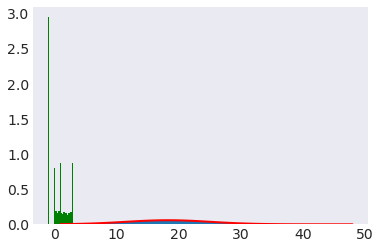

In [15]:
count, bins, ignored = plt.hist(y, 47, density=True)
plt.hist(Matrix[:, 266], 47, density=True, color = 'g')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
        np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
        linewidth=2, color='r')

In [19]:
regr = LogisticRegression()
regr.fit(Matrix, y)

LogisticRegression()

In [23]:
print(accuracy_score(y, regr.predict(Matrix)))
y_pred1 = regr.predict(Matrix)
dif = (((y - y_pred1)).mean())
print(dif)

0.1409
0.2233


In [57]:
y_answ10000 = rf.predict(Tester)
print(y_answ10000.shape)

(50000,)


In [59]:
y_answ1000 = rf1.predict(Tester)
print(y_answ1000.shape)

(50000,)


In [58]:
y_answ500 = rf2.predict(Tester)
print(y_answ500.shape)

(50000,)


In [23]:
print(t)

[-2.44246358e-01 -1.30444152e-02 -1.99218150e-01 -4.42029565e-01
 -2.35279903e-01 -2.96457817e-01 -1.48483530e-01 -2.19010563e-01
  5.91708834e-02 -1.17890568e-01  5.39800561e-02  8.62957431e-02
  2.92976003e-01  1.83026642e-01  2.20966095e-01  1.17192765e-01
 -4.41799593e-01  1.33680150e-01  2.73807442e-01 -2.26677047e-01
  2.24408819e-01  3.54651945e-01  2.09899917e-01  3.74617903e-01
  1.66004836e-01 -1.38658854e-01  1.71646534e-02 -1.88476618e-01
 -5.31842382e-02  1.09455035e-01 -3.71599996e-01 -2.95242836e-01
  7.47828117e-02 -2.42512289e-01 -1.17984675e-02 -1.62826845e-01
  1.84421786e-01  2.18472734e-02  7.26927006e-01  1.86275207e-01
 -3.48083924e-01  1.53284210e-01  1.67850836e-01  8.12525615e-02
  3.35034290e-01  9.99471584e-02 -2.93554409e-02  1.36648669e-01
  1.70125131e-01 -3.29301465e-02  3.09461326e-01  3.57921129e-01
 -4.19528856e-02  4.10783489e-01 -1.83222876e-01 -6.91369773e-02
 -1.37417061e-01  2.75421477e-01 -6.92387396e-02  4.49889522e-01
  3.51018594e-01  5.16853

In [ ]:
rf = Rando

# Подготовка к отпарвке решения

## Проверка нулевого решения

In [106]:
y = np.zeros(50000)

## Сохранение ответа

In [62]:
# сохранить решение
pd.DataFrame({'id': np.arange(50000), 'y':y_answ500}).to_csv('solution2.csv', index=False)